In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [7]:
with open(r"vae_mnist_v3_loss_nine.pickle", "rb") as input_file:
    loss_nine = pickle.load(input_file)

In [8]:
with open(r"vae_mnist_v3_loss_seven.pickle", "rb") as input_file:
    loss_seven = pickle.load(input_file)

In [9]:
with open(r"vae_mnist_v3_loss_five.pickle", "rb") as input_file:
    loss_five = pickle.load(input_file)

In [14]:
with open(r"vae_mnist_v3_wass_fiverand.pickle", "rb") as input_file:
    wass_five_rand = pickle.load(input_file)

In [16]:
with open(r"vae_mnist_v3_wass_sevenrand.pickle", "rb") as input_file:
    wass_seven_rand = pickle.load(input_file)

In [17]:
with open(r"vae_mnist_v3_wass_ninerand.pickle", "rb") as input_file:
    wass_nine_rand = pickle.load(input_file)

In [65]:
with open(r"vae_mnist_v3_wass_five.pickle", "rb") as input_file:
    wass_five = pickle.load(input_file)

In [66]:
with open(r"vae_mnist_v3_wass_seven.pickle", "rb") as input_file:
    wass_seven = pickle.load(input_file)

In [67]:
with open(r"vae_mnist_v3_wass_nine.pickle", "rb") as input_file:
    wass_nine = pickle.load(input_file)

In [68]:
def get_tpr_fpr(sigloss,bkgloss,range_low, range_high, aetype='bkg'):
    bins = np.linspace(range_low,range_high,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr  

(array([128., 418., 276.,  99.,  52.,  20.,   8.,   5.,   2.,   1.]),
 array([0.01983533, 0.03394691, 0.04805848, 0.06217005, 0.07628162,
        0.09039319, 0.10450476, 0.11861633, 0.13272791, 0.14683948,
        0.16095105]),
 <a list of 10 Patch objects>)

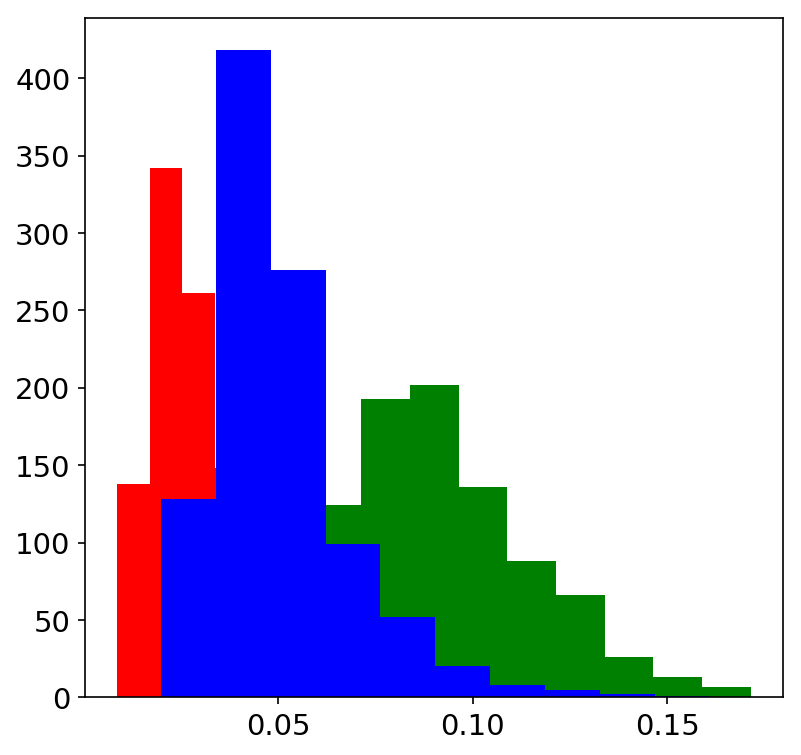

In [69]:
plt.hist(loss_seven,color='r')
plt.hist(loss_five,color='g')
plt.hist(loss_nine,color='b')

(array([ 26., 180., 278., 247., 149.,  62.,  43.,  13.,   9.,   2.]),
 array([0.02107177, 0.02845273, 0.0358337 , 0.04321466, 0.05059563,
        0.05797659, 0.06535756, 0.07273852, 0.08011948, 0.08750045,
        0.09488141]),
 <a list of 10 Patch objects>)

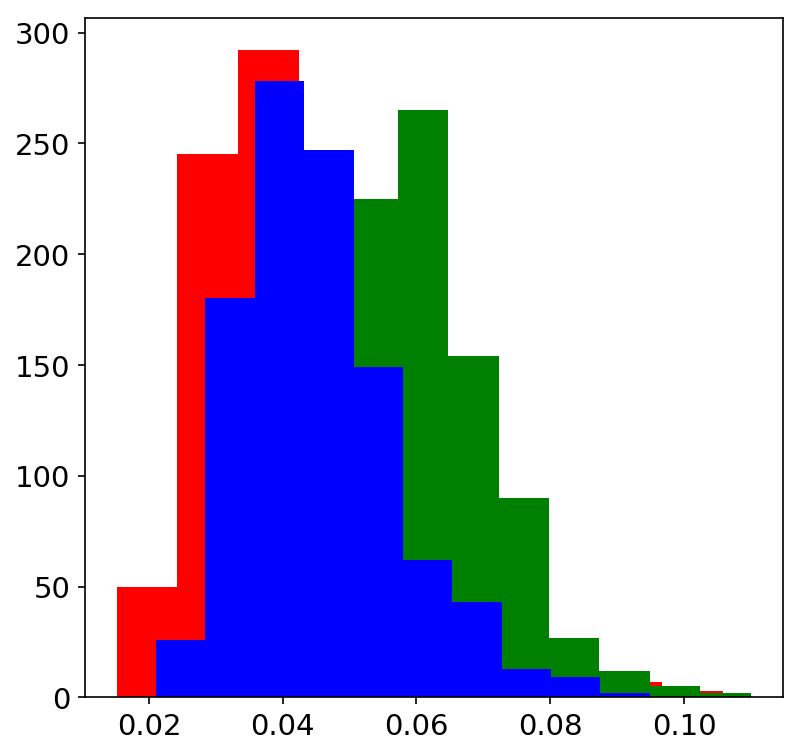

In [70]:
plt.hist(wass_seven,color='r')
plt.hist(wass_five,color='g')
plt.hist(wass_nine,color='b')

In [39]:
loss_tpr_seven, loss_fpr_seven = get_tpr_fpr(loss_seven, loss_five, 0, 0.2, aetype='sig')

In [40]:
loss_tpr_nine, loss_fpr_nine = get_tpr_fpr(loss_nine, loss_five, 0, 0.2, aetype='sig')

In [77]:
wass_tpr_seven, wass_fpr_seven = get_tpr_fpr(wass_seven, wass_five, 0, 0.2, aetype='sig')

In [78]:
wass_tpr_nine, wass_fpr_nine = get_tpr_fpr(wass_nine, wass_five, 0, 0.2, aetype='sig')

In [49]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.dpi'] = 150

Text(0, 0.5, 'tpr')

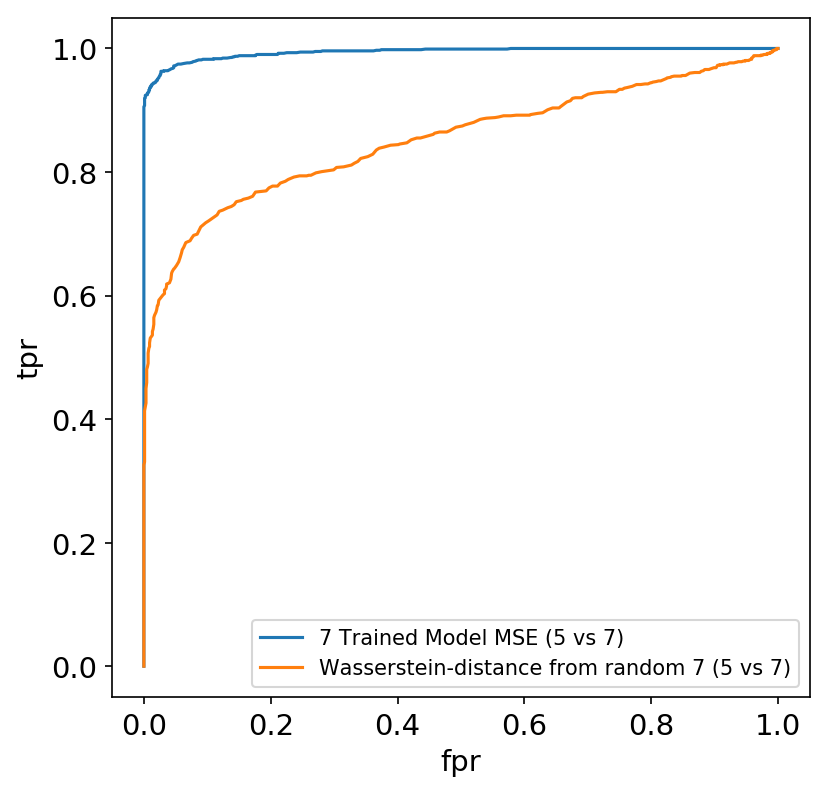

In [79]:
plt.plot(loss_fpr_seven, loss_tpr_seven, label='7 Trained Model MSE (5 vs 7)')
plt.plot(wass_fpr_seven, wass_tpr_seven, label='Wasserstein-distance from random 7 (5 vs 7)')
plt.legend(loc=4,fontsize=10)
plt.xlabel('fpr')
plt.ylabel('tpr')

Text(0, 0.5, 'tpr')

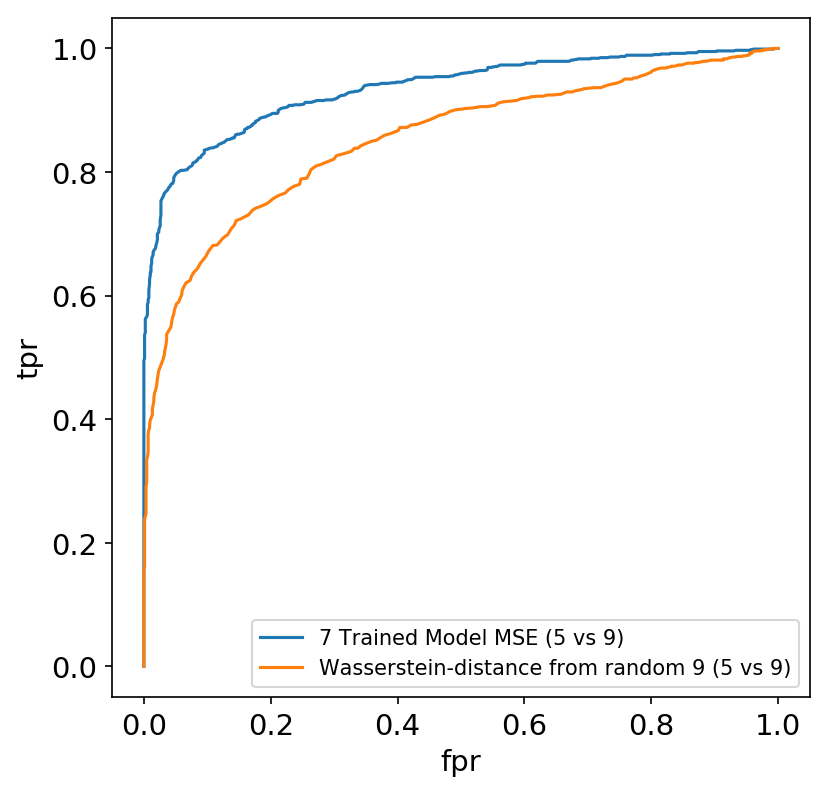

In [80]:
plt.plot(loss_fpr_nine, loss_tpr_nine, label='7 Trained Model MSE (5 vs 9)')
plt.plot(wass_fpr_nine, wass_tpr_nine, label='Wasserstein-distance from random 9 (5 vs 9)')
plt.legend(loc=4,fontsize=10)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [52]:
from scipy.stats import pearsonr

In [71]:
pearsonr_test = pearsonr(loss_five, wass_five)


In [72]:
pearsonr_test

(-0.11282587656634933, 0.0007361254117665049)

In [73]:
pearsonr_test = pearsonr(loss_seven, wass_seven)


In [74]:
pearsonr_test

(0.38421286252562964, 1.6759643948718228e-37)

In [75]:
pearsonr_test = pearsonr(loss_nine, wass_nine)


In [76]:
pearsonr_test

(0.44442710259720763, 4.311752836932095e-50)